In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stat
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib as mpl

In [7]:
x_train = pd.read_csv('data/train.csv',index_col='Id').drop(1299)
x_test = pd.read_csv('data/test.csv',index_col='Id')
x_Ktest = pd.read_csv('data/Ktest.csv',index_col='Id')

In [210]:
t_train = pd.read_csv('data/train_tree.csv',index_col='Id').drop(1299)
t_test = pd.read_csv('data/test_tree.csv',index_col='Id')
t_Ktest = pd.read_csv('data/Ktest_tree.csv',index_col='Id')

In [8]:
y_train = pd.read_csv('data/Model Train.csv',index_col='Id').drop(1299)['SalePrice']
y_test = pd.read_csv('data/Model Test.csv',index_col='Id')['SalePrice']
y_train = np.log(y_train)
y_test = np.log(y_test)

In [9]:
x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test])

In [318]:
price = pd.concat([pd.read_csv('data/Model Train.csv',index_col='Id').drop(1299)['SalePrice'], pd.read_csv('data/Model Test.csv',index_col='Id')['SalePrice']])
print('Median', price.median())
print('Mean', price.mean())

Median 163000.0
Mean 180935.53529814942


In [273]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(x_train2)
ols = sm.OLS(np.log(y_train), X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     156.7
Date:                Sun, 01 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:27:35   Log-Likelihood:                 3913.0
No. Observations:                1167   AIC:                            -7632.
Df Residuals:                    1070   BIC:                            -7141.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.49

In [325]:
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
table = pd.DataFrame(ans.summary().tables[1].data[1:])
table.columns = ['name','coef','std err','t value','p value','2.5% confidence','97.5% confidence']
table = table.astype({'name':str,'coef':float,'std err':float, 't value':float, 'p value':float,'2.5% confidence':float, '97.5% confidence':float})
coef_df = table[table['p value']<0.05].sort_values('coef', ascending = False)
coef_df
#[table['p value']<0.05]

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence
0,const,12.0689,0.013,903.344,0.000,12.043,12.095
68,SaleType_ConLD,0.1692,0.051,3.347,0.001,0.070,0.268
40,GrLivArea,0.1586,0.009,17.570,0.000,0.141,0.176
25,Neighborhood_StoneBr,0.1584,0.030,5.318,0.000,0.100,0.217
85,RoofMatl_WdShngl,0.1400,0.051,2.770,0.006,0.041,0.239
21,Neighborhood_NridgHt,0.1292,0.019,6.976,0.000,0.093,0.166
14,Neighborhood_Crawfor,0.1266,0.020,6.395,0.000,0.088,0.165
20,Neighborhood_NoRidge,0.0947,0.021,4.478,0.000,0.053,0.136
86,Exterior1st_BrkFace,0.0783,0.021,3.774,0.000,0.038,0.119
13,Neighborhood_ClearCr,0.0684,0.025,2.694,0.007,0.019,0.118


In [322]:
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
table = pd.DataFrame(ans.summary().tables[1].data[1:])
table.columns = ['name','coef','std err','t value','p value','2.5% confidence','97.5% confidence']
table = table.astype({'name':str,'coef':float,'std err':float, 't value':float, 'p value':float,'2.5% confidence':float, '97.5% confidence':float})
coef_df = table.sort_values('coef', ascending = False)
coef_df

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence
0,const,12.0689,0.013,903.344,0.000,12.043,12.095
68,SaleType_ConLD,0.1692,0.051,3.347,0.001,0.070,0.268
40,GrLivArea,0.1586,0.009,17.570,0.000,0.141,0.176
25,Neighborhood_StoneBr,0.1584,0.030,5.318,0.000,0.100,0.217
85,RoofMatl_WdShngl,0.1400,0.051,2.770,0.006,0.041,0.239
...,...,...,...,...,...,...,...
28,Condition1_PosN,-0.0862,0.028,-3.035,0.002,-0.142,-0.030
26,Condition1_Artery,-0.0887,0.019,-4.790,0.000,-0.125,-0.052
51,Functional_Other,-0.0906,0.014,-6.317,0.000,-0.119,-0.062
29,Condition1_RRAe,-0.1081,0.034,-3.177,0.002,-0.175,-0.041


### Categorical Variable

#### Neighborhood

In [337]:
import re
nb = coef_df[coef_df['name'].str.match('Neighborhood')]
nb['Price Change Ratio'] = np.exp(nb['coef'])
nb.sort_values('Price Change Ratio')

#Base Neighborhood North Ames

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence,Price Change Ratio
15,Neighborhood_Edwards,-0.0713,0.014,-5.145,0.000,-0.098,-0.044,0.931182
16,Neighborhood_Gilbert,-0.0494,0.018,-2.794,0.005,-0.084,-0.015,0.951800
19,Neighborhood_NWAmes,-0.0402,0.017,-2.301,0.022,-0.074,-0.006,0.960597
12,Neighborhood_BrkSide,0.0492,0.019,2.521,0.012,0.011,0.087,1.050430
13,Neighborhood_ClearCr,0.0684,0.025,2.694,0.007,0.019,0.118,1.070794
20,Neighborhood_NoRidge,0.0947,0.021,4.478,0.000,0.053,0.136,1.099329
14,Neighborhood_Crawfor,0.1266,0.020,6.395,0.000,0.088,0.165,1.134963
21,Neighborhood_NridgHt,0.1292,0.019,6.976,0.000,0.093,0.166,1.137918
25,Neighborhood_StoneBr,0.1584,0.030,5.318,0.000,0.100,0.217,1.171635


#### roof

In [324]:
roof = coef_df[coef_df['name'].str.match('RoofMatl')]
roof['Price Change'] = np.exp(roof['coef'])*price.median()-price.median()
roof
# baseline for roof is CompShg

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence,Price Change
85,RoofMatl_WdShngl,0.14,0.051,2.77,0.006,0.041,0.239,24494.629214


In [326]:
# lower bound
roof = coef_df[coef_df['name'].str.match('RoofMatl')]
roof['Price Change'] = np.exp(roof['2.5% confidence'])*price.median()-price.median()
roof

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence,Price Change
85,RoofMatl_WdShngl,0.14,0.051,2.77,0.006,0.041,0.239,6821.893204


In [327]:
# upper bound
roof = coef_df[coef_df['name'].str.match('RoofMatl')]
roof['Price Change'] = np.exp(roof['97.5% confidence'])*price.median()-price.median()
roof

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence,Price Change
85,RoofMatl_WdShngl,0.14,0.051,2.77,0.006,0.041,0.239,44006.501463


#### Month

In [304]:
mon = coef_df[coef_df['name'].str.match('MoSold')]
mon['Price Change Ratio'] = np.exp(mon['coef'])
mon

#Baseline June

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence,Price Change Ratio
65,MoSold_5,0.0220,0.010,2.214,0.027,0.003,0.042,1.022244
66,MoSold_7,0.0097,0.009,1.055,0.292,-0.008,0.028,1.009747
64,MoSold_3,-0.0151,0.013,-1.170,0.242,-0.040,0.010,0.985013
67,MoSold_10,-0.0280,0.014,-2.047,0.041,-0.055,-0.001,0.972388


### Numerical Variables

### Models 

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
from sklearn.linear_model import Ridge, Lasso, LassoCV, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm
import math

ridge = Ridge()
lasso = Lasso()
lassoCV = LassoCV()
net   = ElasticNet()
lm    = LinearRegression()
gb    = GradientBoostingRegressor()

### K_Fold

In [12]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

### Multi linear 

In [74]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
# R^2
rss = np.sum((y_train-lm.predict(x_train))**2)
print('R^2 for training data:', math.sqrt(rss/x_train.shape[0]))

rss = np.sum((y_test-lm.predict(x_test))**2)
print('R^2 for testing data:', math.sqrt(rss/x_test.shape[0]))

# need to select features

R^2 for training data: 0.09798398791901823
R^2 for testing data: 2034596362.63445


In [260]:
lm.fit(x_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [261]:
rss = np.sum((y_train-lm.predict(x_train2))**2)
print('R^2 for training data:', math.sqrt(rss/x_train.shape[0]))

rss = np.sum((y_test-lm.predict(x_test2))**2)
print('R^2 for testing data:', math.sqrt(rss/x_test.shape[0]))

R^2 for training data: 0.1016469004469691
R^2 for testing data: 13575100940.192455


In [270]:
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [262]:
# feature selection 
import statsmodels.api as sm
from sklearn.feature_selection import RFE

### Lasso & Feature Selection

In [15]:
lasso = lasso.set_params(random_state=40)
lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=40,
      selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
lasso_pred = lasso.predict(x_test)

# MAE, MSE, RMSE
errors = abs(np.expm1(lasso_pred) - np.expm1(y_test))
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
errors = abs(np.expm1(lasso_pred) - np.expm1(y_test))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, lasso_pred)))

Mean Absolute Error (MAE): $ 55528.4
Root Mean Square Error (RMSE): 0.4149359020256681


### Tune Hyperparameter

In [20]:
alphas = np.logspace(1, 0, 1000)
params = {'alpha': alphas}

grid_search_lasso = GridSearchCV( estimator=lasso, param_grid=params, scoring= 'neg_mean_squared_error', 
                                    cv= kf )
grid_search_lasso.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=40,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-09, 1.14975...
       7.05480231e-05, 8.11130831e-05, 9.32603347e-05, 1.07226722e-04,
       1.23284674e-04, 1.41747416e-04, 1.62975083e-04, 1.87381742e-04,
       2.15443469e-04, 2.47707636e-04, 2.84803587e-04, 3.27454916e-04,
       3.76493581e-04, 4.32876128e-04, 4.97702356e-04, 5.72236766e-04,
       6.57933225e-04, 7.56463328e-04, 8.69749003e-04, 1.00000000e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose

In [21]:
print('The parameters combination that would give best accuracy is : ', grid_search_lasso.best_params_)

The parameters combination that would give best accuracy is :  {'alpha': 0.0004977023564332114}


In [22]:
# Prediction using the tuned parameters
grid_lasso = grid_search_lasso.best_estimator_

In [23]:
print("The train set R^2 is: %.5f" % grid_lasso.score(x_train, y_train))
print("The test set R^2 is is: %.5f" % grid_lasso.score(x_test, y_test))

The train set R^2 is: 0.93009
The test set R^2 is is: 0.91165


In [24]:
lasso_pred = grid_lasso.predict(x_test)

# MAE, MSE, RMSE
errors = abs(np.expm1(lasso_pred) - np.expm1(y_test))
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
errors = abs(np.expm1(lasso_pred) - np.expm1(y_test))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, lasso_pred)))

Mean Absolute Error (MAE): $ 14828.01
Root Mean Square Error (RMSE): 0.12333049076402075


<Figure size 1152x648 with 0 Axes>

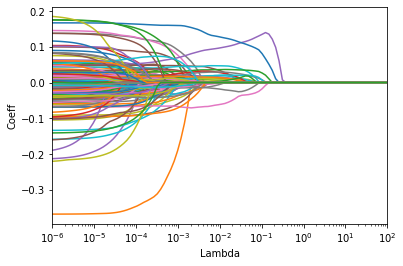

In [26]:
# plot the coef vs alpha
plt.figure(figsize= (16,9))
alphas = np.logspace(-6, 2, 100)
coef_lasso = []
for alpha in alphas:
    lasso.set_params(alpha=alpha).fit(x_train, y_train)
    coef_lasso.append(lasso.coef_)
df_coef = pd.DataFrame(coef_lasso, index=alphas, columns = x_train.columns)
df_coef.plot(logx=True, legend = False)
plt.xlabel('Lambda')
plt.ylabel('Coeff')
#plt.savefig('lasso_fea.png', dpi = 500)
plt.show()

In [42]:
# feature importance
coeff = pd.DataFrame({"feature":x_train.columns,"coeff":grid_lasso.coef_})
coeff = coeff.sort_values(by = 'coeff', ascending = False)

print("Lasso picked " + str(sum(coeff.coeff != 0)) + " variables and eliminated the other " +  
      str(sum(coeff.coeff == 0)) + " variables")

coeff[coeff.coeff!=0].head(15)

Lasso picked 97 variables and eliminated the other 96 variables


,feature,coeff
70,GrLivArea,0.160453
27,Neighborhood_Crawfor,0.110340
42,Neighborhood_StoneBr,0.103812
36,Neighborhood_NridgHt,0.101237
35,Neighborhood_NoRidge,0.076168
159,Exterior1st_BrkFace,0.072344
64,OverallQual,0.063173
65,OverallCond,0.047527
69,LotArea,0.042599
25,Neighborhood_ClearCr,0.041679


In [56]:
zero_coeff = coeff[coeff.coeff==0].feature.to_list()

In [57]:
x_train2 = x_train.copy()
x_train2 = x_train2.drop(zero_coeff, axis=1)

In [58]:
x_test2 = x_test.copy()
x_test2 = x_test2.drop(zero_coeff, axis=1)

In [177]:
x_Ktest2 = x_Ktest.copy()
x_Ktest2 = x_Ktest2.drop(zero_coeff, axis=1)

In [178]:
# tune the parameters again
alphas = np.logspace(-9, -3, 100)
params = {'alpha': alphas}

grid_search_lasso = GridSearchCV( estimator=lasso, param_grid=params, scoring= 'neg_mean_squared_error', 
                                    cv= kf )
grid_search_lasso.fit(x_train2, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-09, 1.149...
       7.05480231e-05, 8.11130831e-05, 9.32603347e-05, 1.07226722e-04,
       1.23284674e-04, 1.41747416e-04, 1.62975083e-04, 1.87381742e-04,
       2.15443469e-04, 2.47707636e-04, 2.84803587e-04, 3.27454916e-04,
       3.76493581e-04, 4.32876128e-04, 4.97702356e-04, 5.72236766e-04,
       6.57933225e-04, 7.56463328e-04, 8.69749003e-04, 1.00000000e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose

In [44]:
print('The parameters combination that would give best accuracy is : ', grid_search_lasso.best_params_)

The parameters combination that would give best accuracy is :  {'alpha': 0.00014174741629268049}


In [45]:
# Prediction after drop columns 
grid_lasso = grid_search_lasso.best_estimator_

In [46]:
print("The train set R^2 is: %.5f" % grid_lasso.score(x_train2, y_train))
print("The test set R^2 is is: %.5f" % grid_lasso.score(x_test2, y_test))

The train set R^2 is: 0.93363
The test set R^2 is is: 0.91137


In [50]:
lasso_pred = grid_lasso.predict(x_test2)

# MAE, MSE, RMSE
errors = abs(np.expm1(lasso_pred) - np.expm1(y_test))
print('Mean Absolute Error (MAE) after tune: $', round(np.mean(errors), 2))
errors = abs(np.expm1(lasso_pred) - np.expm1(y_test))
print('Root Mean Square Error (RMSE) after tune:', np.sqrt(mean_squared_error(y_test, lasso_pred)))

Mean Absolute Error (MAE) after tune: $ 14766.99
Root Mean Square Error (RMSE) after tune: 0.12352414430825047


In [207]:
kaggle = pd.DataFrame(np.exp(grid_lasso.predict(x_Ktest2)))
kaggle.index = x_Ktest2.index
# kaggle = kaggle.reset_index()
kaggle.columns = ['SalePrice']
kaggle
kaggle.to_csv('kaggle.csv')

In [198]:
kaggle

,Id,SalePrice
0,1461,114225.230297
1,1462,152473.067468
2,1463,179623.402208
3,1464,193094.211220
4,1465,191474.999065
...,...,...
1454,2915,90612.903937
1455,2916,88770.737582
1456,2917,169617.712187
1457,2918,131066.541710


### E-Net

In [89]:
net.set_params(random_state=12, normalize=True)
net.fit(x_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=12, selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
net_pred = net.predict(x_test)

# MAE, MSE, RMSE
errors = abs(np.expm1(net_pred) - np.expm1(y_test))
print('Mean Absolute Error (MAE) after tune: $', round(np.mean(errors), 2))
errors = abs(np.expm1(lasso_pred) - np.expm1(y_test))
print('Root Mean Square Error (RMSE) after tune:', np.sqrt(mean_squared_error(y_test, net_pred)))

Mean Absolute Error (MAE) after tune: $ 55528.4
Root Mean Square Error (RMSE) after tune: 0.4149359020256681


### Tune E-Net

In [102]:
alphas = np.logspace(-9, -3, 100)
params = {'alpha': alphas}

grid_search_net = GridSearchCV( estimator=net, param_grid=params, scoring= 'neg_mean_squared_error', 
                                    cv= kf )
grid_search_net.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=12, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.000...
       7.05480231e-05, 8.11130831e-05, 9.32603347e-05, 1.07226722e-04,
       1.23284674e-04, 1.41747416e-04, 1.62975083e-04, 1.87381742e-04,
       2.15443469e-04, 2.47707636e-04, 2.84803587e-04, 3.27454916e-04,
       3.76493581e-04, 4.32876128e-04, 4.97702356e-04, 5.72236766e-04,
       6.57933225e-04, 7.56463328e-04, 8.69749003e-04, 1.00000000e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
     

In [115]:
print('The parameters combination that would give best accuracy is : ', grid_search_net.best_params_)
grid_net = grid_search_net.best_estimator_

The parameters combination that would give best accuracy is :  {'alpha': 0.00014174741629268049}


In [107]:
print("The train set R^2 is: %.5f" % grid_net.score(x_train, y_train))
print("The test set R^2 is is: %.5f" % grid_net.score(x_test, y_test))

The train set R^2 is: 0.92899
The test set R^2 is is: 0.91028


In [117]:
net_pred = grid_net.predict(x_test)

# MAE, MSE, RMSE
errors = abs(np.expm1(net_pred) - np.expm1(y_test))
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
errors = abs(np.expm1(net_pred) - np.expm1(y_test))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, net_pred)))

Mean Absolute Error (MAE): $ 14919.89
Root Mean Square Error (RMSE): 0.12428453335186868


In [132]:
#Elastic regression tune rho
para = {}
for j in np.arange(0,1.0,0.02):
    elastic = ElasticNet(alpha = opt_alpha, l1_ratio = j,random_state=5, normalize=True)
    rmse= np.sqrt(-cross_val_score(elastic, x_train2.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    para[np.mean(rmse)] = j
rho_opt = para[min(para)]
print("The Optimized Rho is:", round(rho_opt,2))

The Optimized Rho is: 0.22


### Tuned Alpha and Rho

In [138]:
elastic = ElasticNet(alpha = opt_alpha, l1_ratio = rho_opt, normalize=True)

In [139]:
elastic.fit(x_train2,y_train)

ElasticNet(alpha=4.037017258596558e-05, copy_X=True, fit_intercept=True,
           l1_ratio=0.22, max_iter=1000, normalize=True, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [140]:
net_pred = elastic.predict(x_test2)

# MAE, MSE, RMSE
errors = abs(np.expm1(net_pred) - np.expm1(y_test))
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
errors = abs(np.expm1(net_pred) - np.expm1(y_test))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, net_pred)))

Mean Absolute Error (MAE): $ 14790.59
Root Mean Square Error (RMSE): 0.12346753201017997


In [143]:
print("The train set R^2 is: %.5f" % elastic.score(x_train2, y_train))
print("The test set R^2 is is: %.5f" % elastic.score(x_test2, y_test))

The train set R^2 is: 0.93264
The test set R^2 is is: 0.91145


In [206]:
kaggle = pd.DataFrame(np.exp(elastic.predict(x_Ktest2)))
kaggle.index = x_Ktest2.index
# kaggle = kaggle.reset_index()
kaggle.columns = ['SalePrice']
kaggle
kaggle.to_csv('kaggle2.csv')

### Gradient Boosting

In [238]:
gb.set_params(random_state=12)
gb.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=12, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [239]:
gb_pred = gb.predict(t_test)

# MAE, RMSE
errors = abs(np.expm1(gb_pred) - np.expm1(y_test))
print('Mean Absolute Error (MAE) after tune: $', round(np.mean(errors), 2))
errors = abs(np.expm1(gb_pred) - np.expm1(y_test))
print('Root Mean Square Error (RMSE) after tune:', np.sqrt(mean_squared_error(y_test, gb_pred)))

Mean Absolute Error (MAE) after tune: $ 15700.55
Root Mean Square Error (RMSE) after tune: 0.13376725617133975


In [240]:
print("The train set R^2 is: %.5f" % gb.score(t_train, y_train))
print("The test set R^2 is is: %.5f" % gb.score(t_test, y_test))

The train set R^2 is: 0.96155
The test set R^2 is is: 0.89606


### Tune GB

In [330]:
gb_param_grid={'learning_rate': [0.06], 'max_depth': [4], 'n_estimators': [450]}

In [334]:
grid_search_gb = GridSearchCV(gb, gb_param_grid, scoring='neg_mean_squared_error')

grid_search_gb.fit(t_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
           

In [159]:
print('The parameters combination that would give best accuracy is : ', grid_search_gb.best_params_)
grid_bg = grid_search_gb.best_estimator_

The parameters combination that would give best accuracy is :  {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 600}


In [160]:
print("The train set R^2 is: %.5f" % grid_bg.score(x_train2, y_train))
print("The test set R^2 is is: %.5f" % grid_bg.score(x_test2, y_test))

The train set R^2 is: 0.97733
The test set R^2 is is: 0.90825


In [161]:
bg_pred = grid_bg.predict(x_test2)

# MAE, RMSE
errors = abs(np.expm1(bg_pred) - np.expm1(y_test))
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
errors = abs(np.expm1(bg_pred) - np.expm1(y_test))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, bg_pred)))

Mean Absolute Error (MAE): $ 14144.11
Root Mean Square Error (RMSE): 0.12568463424715423


In [166]:
# feature importance
# Get numerical feature importances
importances_gb = list(grid_bg.feature_importances_)

# List of tuples with variable and importance
feature_importances_gb = [(feature, round(importance, 5)) for feature, importance in zip(x_train2.columns, importances_gb)]

# Sort the feature importances by most important first
gb_feature_importances = sorted(feature_importances_gb, key = lambda x: x[1], reverse = True )

In [167]:
gb_feature_importances_top20 = gb_feature_importances[:20]
featureNames, featureScores = zip(*list(gb_feature_importances_top20))

Text(0.5, 1.0, 'Feature Importances')

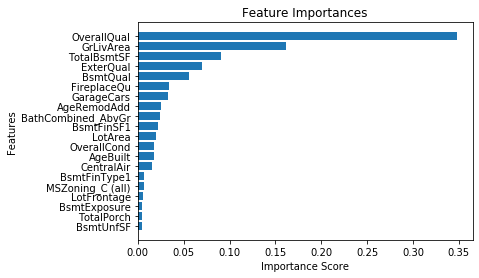

In [168]:
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.title('feature importance')
plt.gca().invert_yaxis()
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importances')

In [208]:
kaggle = pd.DataFrame(np.exp(grid_bg.predict(x_Ktest2)))
kaggle.index = x_Ktest2.index
# kaggle = kaggle.reset_index()
kaggle.columns = ['SalePrice']
kaggle
kaggle.to_csv('kaggle.csv')